<h1 align=center><font size = 5>Investigation Neighborhoods in Ibaraki-prefecture, Japan for openning a Coffee Shop</font></h1>

## 1. Scrape Population data from public sites using Beautifulsoup

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
!pip install bs4
from bs4 import BeautifulSoup
import requests
import csv
import re
import numpy as np


# Step 1: Sending a HTTP request to a URL
url = "https://www.pref.ibaraki.jp/kikaku/tokei/fukyu/tokei/betsu/jinko/getsu/jinko2001.html"
# Make a GET request to fetch the raw HTML content
r = requests.get(url)
content_type_encoding = r.encoding if r.encoding != 'ISO-8859-1' else None

     |████████████████████████████████| 122kB 9.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
# Step 2: Parse the html content
soup = BeautifulSoup(r.content, 'html.parser', from_encoding=content_type_encoding)
#print(soup.prettify()) # print the parsed data of html

In [3]:
tables = soup.find_all('table', class_='datatable')

## 1.1. Scrape Table_1

In [4]:
#SCRAPE TABLE_1:"表-1.人口と世帯の推移" <=> "PUPULATION AND HOUSEHOLD TRENDS" into a PANDAS DATAFRAME called df0
#get headers & clean the unneccessary characters:
headers_0=tables[0].findAll('th')

for i, head in enumerate(headers_0):
    headers_0[i]=str(headers_0[i]).replace("<th rowspan=\"3\" scope=\"row\">","").replace("<th nowrap=\"nowrap\" rowspan=\"3\" scope=\"row\">","").replace("<th rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_0):
    headers_0[i]=str(headers_0[i]).replace("</th>","").replace("<br/>\n","").replace("<th nowrap=\"nowrap\" rowspan=\"2\" scope=\"row\">\n<p>","").replace("</p>\n<p>","").replace("</p>\n","")
headers_0.remove('<th colspan=\"6\" scope=\"row\">人口')

#Find all rows data in TABLE_1: 
table0_rows = tables[0].find_all('tr')

#Because the first row is the header, only select data from 2nd row
table0_rows = table0_rows[3:len(table0_rows)]

#Create a list of data in each row
l0 = []
for tr in table0_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l0.append(row)

#Create dataframe & clean the unneccessary characters:
df0 = pd.DataFrame(l0, columns=headers_0)
df0 = df0.replace('\n','', regex=True)
df0 = df0.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df0.set_index('年月日', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df0newcolumns = ['Total_Household', 'Ave_People_in_Household', 'Total_Population', 'Man', 'Women', 'Population_compared_to_previous_Investigation', 'Percentage_compared_to_previous_Investigation', 'Density_(People/kmsquare)']
df0.columns = df0newcolumns
df0newindex = ['1955_Oct', '1960-Oct', '1965_Oct', '1970_Oct', '1975_Oct', '1980_Oct', '1985_Oct', '1990_Oct', '1995_Oct', '2000_Oct',
               '2005_Oct', '2010_Oct', '2015_Oct', '2018_Dec', '2020_Jan']
df0.index = df0newindex

#Convert all columns of DataFrame to numeric types
df0 = df0.apply(pd.to_numeric)
print('TABLE 1: PUPULATION AND HOUSEHOLD TRENDS')
df0

TABLE 1: PUPULATION AND HOUSEHOLD TRENDS


,Total_Household,Ave_People_in_Household,Total_Population,Man,Women,Population_compared_to_previous_Investigation,Percentage_compared_to_previous_Investigation,Density_(People/kmsquare)
1955_Oct,382315,5.39,2064037,1006093,1057944,24619,1.2,338.9
1960-Oct,409465,5.03,2047024,1000184,1046840,-17013,-0.8,336.2
1965_Oct,447871,4.55,2056154,1007852,1048302,9130,0.4,337.7
1970_Oct,508537,4.16,2143551,1054003,1089548,87397,4.3,352.1
1975_Oct,590131,3.92,2342198,1159707,1182491,198647,9.3,384.6
1980_Oct,692855,3.66,2558007,1272533,1285474,215809,9.2,419.9
1985_Oct,758085,3.56,2725005,1357963,1367042,166998,6.5,447.1
1990_Oct,833634,3.39,2845382,1419117,1426265,120377,4.4,467.0
1995_Oct,922745,3.17,2955530,1476437,1479093,110148,3.9,485.0
2000_Oct,985829,2.99,2985676,1488340,1497336,30146,1.0,489.8


In [5]:
df0.dtypes

Total_Household                                    int64
Ave_People_in_Household                          float64
Total_Population                                   int64
Man                                                int64
Women                                              int64
Population_compared_to_previous_Investigation      int64
Percentage_compared_to_previous_Investigation    float64
Density_(People/kmsquare)                        float64
dtype: object

## 1.2. Scrape Table_2

In [6]:
#SCRAPE TABLE_2: "県の世帯数,人口及び人口移動" <=> "PREFECTURE HOUSEHOLDS, POPULATION, MIGRATION" into a PANDAS DATAFRAME called df1
#get headers & clean the unneccessary characters:
headers_1=tables[1].findAll('th')

for i, head in enumerate(headers_1):
    headers_1[i]=str(headers_1[i]).replace("<th colspan=\"2\" rowspan=\"4\" scope=\"row\">","").replace("<th rowspan=\"4\" scope=\"row\">","").replace("<th colspan=\"3\" rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_1):
    headers_1[i]=str(headers_1[i]).replace("<th colspan=\"7\" scope=\"row\">","").replace("<th rowspan=\"3\" scope=\"row\">","").replace("<th colspan=\"3\" scope=\"row\">","").replace("</p>\n<p>","").replace("<th rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_1):
    headers_1[i]=str(headers_1[i]).replace("</th>","").replace("<br/>\n","")

headers_1.remove('人口')
headers_1.remove('前月中の人口移動')
headers_1.remove('自然動態')
headers_1.remove('社会動態')

#Find all rows data in TABLE_2: 
table1_rows = tables[1].find_all('tr')

#Because the first 4 rows are the header, only select data from 2nd row
table1_rows = table1_rows[4:len(table1_rows)]

#Create a list of data in each row
l1 = []
for tr in table1_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l1.append(row)

#Create dataframe & clean the unneccessary characters:
df1 = pd.DataFrame(l1, columns=headers_1)
df1 = df1.replace('\n','', regex=True)
df1 = df1.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df1.set_index('年月日', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df1newcolumns = ['Total_Household', 'Total_Population', 'Man', 'Women', 'Increase_or_Decrease', 'Natural_Reasons', 'Birth', 'Dead', 'Migration_Reasons', 'In', 'Out']
df1.columns = df1newcolumns
df1newindex = ['2019_Jan', '2019_Feb', '2019_Mar', '2019_Apr', '2019_May', '2019_Jun', '2019_Jul', '2019_Aug', '2019_Sep', '2019_Oct',
               '2019_Nov', '2019_Dec', '2020_Jan']
df1.index = df1newindex

#Convert all columns of DataFrame to numeric types
df1 = df1.apply(pd.to_numeric)
#print('TABLE 2: PREFECTURE HOUSEHOLDS, POPULATION, MIGRATION')
df1

,Total_Household,Total_Population,Man,Women,Increase_or_Decrease,Natural_Reasons,Birth,Dead,Migration_Reasons,In,Out
2019_Jan,1163338,2881020,1438291,1442729,-1120,-1276,1553,2829,156,8057,7901
2019_Feb,1163573,2879225,1437482,1441743,-1795,-2058,1667,3725,263,8297,8034
2019_Mar,1163464,2877206,1436506,1440700,-2019,-1576,1446,3022,-443,8451,8894
2019_Apr,1164984,2870883,1433317,1437566,-6323,-1293,1410,2703,-5030,18524,23554
2019_May,1168885,2871872,1434181,1437691,989,-1200,1426,2626,2189,15840,13651
2019_Jun,1170033,2871199,1433974,1437225,-673,-1330,1691,3021,657,9623,8966
2019_Jul,1170582,2870018,1433374,1436644,-1181,-811,1443,2254,-370,7904,8274
2019_Aug,1171498,2869312,1433170,1436142,-706,-1071,1587,2658,365,9314,8949
2019_Sep,1172116,2868148,1432670,1435478,-1164,-1043,1597,2640,-121,8694,8815
2019_Oct,1173307,2868041,1432563,1435478,-107,-1052,1586,2638,945,9332,8387


In [7]:
df1.dtypes

Total_Household         int64
Total_Population        int64
Man                     int64
Women                   int64
Increase_or_Decrease    int64
Natural_Reasons         int64
Birth                   int64
Dead                    int64
Migration_Reasons       int64
In                      int64
Out                     int64
dtype: object

## 1.3. Scrape Table_3

In [8]:
#SCRAPE TABLE_3: "地域の世帯数,人口及び人口移動" <=> "IBARAKI'S AREAS HOUSEHOLDS, POPULATION, MIGRATION" into a PANDAS DATAFRAME called df2
#get headers & clean the unneccessary characters:
headers_2=tables[2].findAll('th')

for i, head in enumerate(headers_2):
    headers_2[i]=str(headers_2[i]).replace("<th colspan=\"2\" rowspan=\"4\" scope=\"row\">","").replace("<th rowspan=\"4\" scope=\"row\">","").replace("<th colspan=\"3\" rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_2):
    headers_2[i]=str(headers_2[i]).replace("<th colspan=\"7\" scope=\"row\">","").replace("<th rowspan=\"3\" scope=\"row\">","").replace("<th colspan=\"3\" scope=\"row\">","").replace("</p>\n<p>","").replace("<th rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_2):
    headers_2[i]=str(headers_2[i]).replace("</th>","").replace("<br/>\n","").replace("<th nowrap=\"nowrap\" rowspan=\"2\" scope=\"row\">","")

headers_2.remove('人口')
headers_2.remove('前月中の人口移動')
headers_2.remove('自然動態')
headers_2.remove('社会動態')

#Find all rows data in TABLE_3: 
table2_rows = tables[2].find_all('tr')

#Because the first 4 rows are the header, only select data from 2nd row
table2_rows = table2_rows[4:len(table2_rows)]

#Create a list of data in each row
l2 = []
for tr in table2_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l2.append(row)

#Create dataframe & clean the unneccessary characters:
df2 = pd.DataFrame(l2, columns=headers_2)
df2 = df2.replace('\n','', regex=True)
df2 = df2.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df2.set_index('地域', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df2newcolumns = ['Total_Household', 'Total_Population', 'Man', 'Women', 'Increase_or_Decrease', 'Natural_Reasons', 'Birth', 'Dead', 'Migration_Reasons', 'In', 'Out']
df2.columns = df2newcolumns
df2newindex = ['City_Area', 'District_Area', 'North_Prefecture', 'Middle_Prefecture', 'Rooko_Area', 'South_Prefecture', 'West_Prefecture']
df2.index = df2newindex

#Convert all columns of DataFrame to numeric types
df2 = df2.apply(pd.to_numeric)
print('TABLE 3: IBARAKI\'S AREAS HOUSEHOLDS, POPULATION, MIGRATION')
df2


TABLE 3: IBARAKI'S AREAS HOUSEHOLDS, POPULATION, MIGRATION


,Total_Household,Total_Population,Man,Women,Increase_or_Decrease,Natural_Reasons,Birth,Dead,Migration_Reasons,In,Out
City_Area,1074498,2606801,1302010,1304791,-773,-1118,1399,2517,345,7509,7164
District_Area,101396,259524,129715,129809,-169,-204,110,314,35,720,685
North_Prefecture,248615,595827,296583,299244,-423,-380,275,655,-43,1135,1178
Middle_Prefecture,195891,459301,225952,233349,-147,-202,244,446,55,1055,1000
Rooko_Area,109606,269474,137977,131497,-52,-141,137,278,89,803,714
South_Prefecture,421101,1004639,501743,502896,-2,-302,583,885,300,3587,3287
West_Prefecture,200681,537084,269470,267614,-318,-297,270,567,-21,1649,1670


In [9]:
df2.dtypes

Total_Household         int64
Total_Population        int64
Man                     int64
Women                   int64
Increase_or_Decrease    int64
Natural_Reasons         int64
Birth                   int64
Dead                    int64
Migration_Reasons       int64
In                      int64
Out                     int64
dtype: object

## 1.4. Scrape Table_4-1

In [10]:
#SCRAPE TABLE_4-1: "市町村の世帯数,人口及び人口移動" <=> "CITIES, TOWNS & VILLAGES HOUSEHOLDS, POPULATION, MIGRATION" into a PANDAS DATAFRAME called df3
#get headers & clean the unneccessary characters:
headers_3=tables[3].findAll('th')

for i, head in enumerate(headers_3):
    headers_3[i]=str(headers_3[i]).replace("<th colspan=\"2\" rowspan=\"4\" scope=\"row\">","").replace("<th rowspan=\"4\" scope=\"row\">","").replace("<th colspan=\"3\" rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_2):
    headers_3[i]=str(headers_3[i]).replace("<th colspan=\"7\" scope=\"row\">","").replace("<th rowspan=\"3\" scope=\"row\">","").replace("<th colspan=\"3\" scope=\"row\">","").replace("</p>\n<p>","").replace("<th rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_3):
    headers_3[i]=str(headers_3[i]).replace("</th>","").replace("<br/>\n","").replace("<th nowrap=\"nowrap\" rowspan=\"2\" scope=\"row\">","")

headers_3.remove('人口')
headers_3.remove('前月中の人口移動')
headers_3.remove('自然動態')
headers_3.remove('社会動態')

#Find all rows data in TABLE_4-1: 
table3_rows = tables[3].find_all('tr')

#Because the first 4 rows are the header, only select data from 2nd row
table3_rows = table3_rows[4:len(table3_rows)]

#Create a list of data in each row
l3 = []
for tr in table3_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l3.append(row)

#Create dataframe & clean the unneccessary characters:
df3 = pd.DataFrame(l3, columns=headers_3)
df3 = df3.replace('\n','', regex=True)
df3 = df3.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df3.set_index('市町村', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df3newcolumns = ['Total_Household', 'Total_Population', 'Man', 'Women', 'Increase_or_Decrease', 'Natural_Reasons', 'Birth', 'Dead', 'Migration_Reasons', 'In', 'Out']
df3.columns = df3newcolumns
df3newindex = ['Mito-shi', 'Hitachi-shi', 'Tsuchiura-shi', 'Koga-shi', 'Ishioka-shi', 'Yuki-shi', 'Ryugasaki-shi', 'Shimozuma-shi', 'Joso-shi', 'HitachiOta-shi',
                'Takahagi-shi', 'KitaIbaraki-shi', 'Sagama-shi', 'Toride-shi', 'Ushiku-shi', 'Tsukuba-shi', 'Hitachinaka-shi', 'Kashima-shi', 'Itako-shi', 'Moriya-shi',
                'HitachiOmiya-shi', 'Naka-shi', 'Chikusei-shi', 'Bando-shi', 'Inashiki-shi', 'Kasumigaura-shi', 'Sakuragawa-shi', 'Kamisu-shi', 'Namegata-shi', 'Hokota-shi',
                'Tsukubamirai-shi', 'Omitama-shi']
df3.index = df3newindex

#Convert all columns of DataFrame to numeric types
df3 = df3.apply(pd.to_numeric)
print('TABLE 4-1: CITIES, TOWNS & VILLAGES AREAS HOUSEHOLDS, POPULATION, MIGRATION')
df3

TABLE 4-1: CITIES, TOWNS & VILLAGES AREAS HOUSEHOLDS, POPULATION, MIGRATION


,Total_Household,Total_Population,Man,Women,Increase_or_Decrease,Natural_Reasons,Birth,Dead,Migration_Reasons,In,Out
Mito-shi,122398,269763,132189,137574,-51,-68,155,223,17,593,576
Hitachi-shi,78163,175635,87549,88086,-158,-96,70,166,-62,284,346
Tsuchiura-shi,60369,138557,69126,69431,14,-60,79,139,74,480,406
Koga-shi,55670,139107,69691,69416,-46,-63,75,138,17,495,478
Ishioka-shi,28107,72968,36121,36847,-30,-49,37,86,19,185,166
Yuki-shi,19253,50748,25460,25288,-62,-40,20,60,-22,143,165
Ryugasaki-shi,31956,76723,38243,38480,-50,-20,41,61,-30,216,246
Shimozuma-shi,15832,41861,21013,20848,-54,-21,22,43,-33,123,156
Joso-shi,21826,59675,29875,29800,-3,-22,28,50,19,287,268
HitachiOta-shi,19307,48605,23679,24926,-42,-51,18,69,9,82,73


In [11]:
df3.dtypes

Total_Household         int64
Total_Population        int64
Man                     int64
Women                   int64
Increase_or_Decrease    int64
Natural_Reasons         int64
Birth                   int64
Dead                    int64
Migration_Reasons       int64
In                      int64
Out                     int64
dtype: object

## 1.5. Scrape Table_4-2

In [12]:
#SCRAPE TABLE_4-2: "市町村の世帯数,人口及び人口移動" <=> "CITIES, TOWNS & VILLAGES HOUSEHOLDS, POPULATION, MIGRATION" into a PANDAS DATAFRAME called df4
#get headers & clean the unneccessary characters:
headers_4=tables[4].findAll('th')

for i, head in enumerate(headers_4):
    headers_4[i]=str(headers_4[i]).replace("<th colspan=\"2\" rowspan=\"4\" scope=\"row\">","").replace("<th rowspan=\"4\" scope=\"row\">","").replace("<th colspan=\"3\" rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_4):
    headers_4[i]=str(headers_4[i]).replace("<th colspan=\"7\" scope=\"row\">","").replace("<th rowspan=\"3\" scope=\"row\">","").replace("<th colspan=\"3\" scope=\"row\">","").replace("</p>\n<p>","").replace("<th rowspan=\"2\" scope=\"row\">","")
for i, head in enumerate(headers_4):
    headers_4[i]=str(headers_4[i]).replace("</th>","").replace("<br/>\n","").replace("<th nowrap=\"nowrap\" rowspan=\"2\" scope=\"row\">","")

headers_4.remove('人口')
headers_4.remove('前月中の人口移動')
headers_4.remove('自然動態')
headers_4.remove('社会動態')

#Find all rows data in TABLE_4-2
table4_rows = tables[4].find_all('tr')

#Because the first 4 rows are the header, only select data from 2nd row
table4_rows = table4_rows[4:len(table4_rows)]

#Create a list of data in each row
l4 = []
for tr in table4_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l4.append(row)

#Create dataframe & clean the unneccessary characters:
df4 = pd.DataFrame(l4, columns=headers_4)
df4 = df4.replace('\n','', regex=True)
df4 = df4.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df4.set_index('市町村', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df4newcolumns = ['Total_Household', 'Total_Population', 'Man', 'Women', 'Increase_or_Decrease', 'Natural_Reasons', 'Birth', 'Dead', 'Migration_Reasons', 'In', 'Out']
df4.columns = df3newcolumns
df4newindex = ['HigashiIbaraki-gun', 'Ibaraki-cho', 'Oarai-cho', 'Shirosato-cho', 'Naka-gun', 'Tokai-mura', 'Kuji-gun', 'Daigo-cho', 'Inashiki-gun', 'Miho-mura',
                'Ami-cho', 'Kawachi-cho', 'Yuki-gun', 'Yachio-cho', 'Sashima-gun', 'Goka-cho', 'Sakai-cho', 'Kitasoma-gun', 'Tone-cho']
df4.index = df4newindex

#Convert all columns of DataFrame to numeric types
df4 = df4.apply(pd.to_numeric)
print('TABLE 4-2: CITIES, TOWNS & VILLAGES AREAS HOUSEHOLDS, POPULATION, MIGRATION')
df4

TABLE 4-2: CITIES, TOWNS & VILLAGES AREAS HOUSEHOLDS, POPULATION, MIGRATION


,Total_Household,Total_Population,Man,Women,Increase_or_Decrease,Natural_Reasons,Birth,Dead,Migration_Reasons,In,Out
HigashiIbaraki-gun,26048,66124,32615,33509,-46,-72,22,94,26,157,131
Ibaraki-cho,11971,31785,15728,16057,-40,-31,11,42,-9,63,72
Oarai-cho,6842,15987,7930,8057,4,-21,7,28,25,62,37
Shirosato-cho,7235,18352,8957,9395,-10,-20,4,24,10,32,22
Naka-gun,14985,37688,19029,18659,-8,1,29,28,-9,89,98
Tokai-mura,14985,37688,19029,18659,-8,1,29,28,-9,89,98
Kuji-gun,6450,15993,7802,8191,-63,-41,1,42,-22,17,39
Daigo-cho,6450,15993,7802,8191,-63,-41,1,42,-22,17,39
Inashiki-gun,28809,70809,35208,35601,13,-33,33,66,46,240,194
Miho-mura,5854,14593,7417,7176,11,-10,5,15,21,61,40


In [13]:
df4.dtypes

Total_Household         int64
Total_Population        int64
Man                     int64
Women                   int64
Increase_or_Decrease    int64
Natural_Reasons         int64
Birth                   int64
Dead                    int64
Migration_Reasons       int64
In                      int64
Out                     int64
dtype: object

## 1.6. Scrape Table_5

In [14]:
#SCRAPE TABLE_5: 人口順位 - POPULATION RANKS into a PANDAS DATAFRAME called df5
#get headers & clean the unneccessary characters:
headers_5=tables[5].findAll('th')
for i, head in enumerate(headers_5):
    headers_5[i]=str(headers_5[i]).replace("<th scope=\"row\">","").replace("<br/>","").replace("</th>","").replace("\n","")

#Find all rows data in TABLE_5
table5_rows = tables[5].find_all('tr')

#Because the first row is the header, only select data from 2nd row
table5_rows = table5_rows[1:len(table5_rows)]

#Create a list of data in each row
l5 = []
for tr in table5_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l5.append(row)

#Create dataframe & clean the unneccessary characters:
df5 = pd.DataFrame(l5, columns=headers_5)
df5 = df5.replace('\n','', regex=True)
df5 = df5.replace(',','', regex=True)

#Change the first columns (meaning Date) to dataframe index
df5.set_index('市町村', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df5newcolumns = ['Rank', 'Total_Population']
df5.columns = df5newcolumns
df5newindex = ['Mito-shi','Tsukuba-shi','Hitachi-shi','Hitachinaka-shi','Koga-shi','Tsuchiura-shi','Toride-shi','Chikusei-shi','Kamisu-shi','Ushiku-shi',
               'Ryugasaki-shi','Sagama-shi','Ishioka-shi','Moriya-shi','Kashima-shi','Joso-shi','Naka-shi','Bando-shi','Tsukubamirai-shi','Yuki-shi',
               'Omitama-shi','HitachiOta-shi','Ami-cho','Hokota-shi','KitaIbaraki-shi','Shimozuma-shi','Kasumigaura-shi','HitachiOmiya-shi','Inashiki-shi','Sakuragawa-shi',
               'Tokai-mura','Namegata-shi','Ibaraki-cho','Takahagi-shi','Itako-shi','Sakai-cho','Yachio-cho','Shirosato-cho','Daigo-cho','Oarai-cho',
               'Tone-cho','Miho-mura','Kawachi-cho','Goka-cho']
df5.index = df5newindex

#Convert all columns of DataFrame to numeric types
df5 = df5.apply(pd.to_numeric)
print('TABLE 5: POPULATION RANKS')
df5

TABLE 5: POPULATION RANKS


,Rank,Total_Population
Mito-shi,1,269763
Tsukuba-shi,2,241808
Hitachi-shi,3,175635
Hitachinaka-shi,4,155045
Koga-shi,5,139107
Tsuchiura-shi,6,138557
Toride-shi,7,104611
Chikusei-shi,8,100658
Kamisu-shi,9,95428
Ushiku-shi,10,84589


In [15]:
df5.dtypes

Rank                int64
Total_Population    int64
dtype: object

## 1.7. Scrape Table_6

In [16]:
#SCRAPE TABLE_6: "表-4.最近1年間の人口増減数" <=> Changes in population over the last year into a PANDAS DATAFRAME called df7
#get headers & clean the unneccessary characters:
headers_6=tables[6].findAll('th')
for i, head in enumerate(headers_6):
    headers_6[i]=str(headers_6[i]).replace("<th scope=\"row\">","").replace("<br/>","").replace("</th>","").replace("\n","")

#Find all rows data in 7th table: "表-4.最近1年間の人口増減数" <=> Changes in population over the last year
table6_rows = tables[6].find_all('tr')

#Because the first row is the header, only select data from 2nd row
table6_rows = table6_rows[1:len(table6_rows)]

#Create a list of data in each row
l6 = []
for tr in table6_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l6.append(row)

#Create dataframe & clean the unneccessary characters:
df6 = pd.DataFrame(l6, columns=headers_6)
df6 = df6.replace('\n','', regex=True)
df6 = df6.replace(',','', regex=True)

#Change the first columns (name of the cities in Ibaraki-prefecture) to dataframe index
df6.set_index('市町村', inplace=True)

#Columns & Index were Japanese, I changed all of them to English for readers convenience.
df6newcolumns = ['2018_Dec', '2019_Jan', '2019_Feb', '2019-Mar', '2019-Apr', '2019-May', '2019-Jun', '2019-Jul', '2019-Aug', '2019-Sep', '2019-Oct', '2019-Nov', '2019-Dec', 'Total2019']
df6.columns = df6newcolumns
df6newindex = ['Tsukuba-shi', 'Moriya-shi', 'Ami-cho', 'Tsukubamirai-shi', 'Kamisu-shi', 'Tokai-mura', 'Goka-cho', 'Sakai-cho', 'Ushiku-shi', 'Oarai-cho',
                'Kawachi-cho', 'Yachio-cho', 'Kashima-shi', 'Miho-mura', 'Tone-cho', 'Naka-shi', 'Ibaraki-cho', 'Yuki-shi', 'Ryugasaki-shi', 'Shirosato-cho',
                'Toride-shi', 'Shimozuma-shi', 'Hokota-shi', 'Itako-shi', 'Takahagi-shi', 'Omitama-shi', 'Kasumigaura-shi', 'KitaIbaraki-shi', 'Bando-shi', 'Joso-shi',
                'Mito-shi', 'Daigo-cho', 'Hitachinaka-shi', 'Namegata-shi', 'Sakuragawa-shi', 'Sagama-shi', 'Koga-shi', 'Ishioka-shi', 'HitachiOmiya-shi', 'Inashiki-shi',
                'Tsuchiura-shi', 'HitachiOta-shi', 'Chikusei-shi', 'Hitachi-shi', 'Total']
df6.index = df6newindex

#Convert all columns of DataFrame to numeric types
df6 = df6.apply(pd.to_numeric)

print('TABLE 6: CHANGES IN POPULATION OVER THE LAST YEAR')
df6

TABLE 6: CHANGES IN POPULATION OVER THE LAST YEAR


,2018_Dec,2019_Jan,2019_Feb,2019-Mar,2019-Apr,2019-May,2019-Jun,2019-Jul,2019-Aug,2019-Sep,2019-Oct,2019-Nov,2019-Dec,Total2019
Tsukuba-shi,213,253,102,-303,1384,350,174,215,138,713,437,174,210,3847
Moriya-shi,101,-2,86,11,137,89,6,90,72,80,129,112,54,864
Ami-cho,-19,-20,51,-26,103,-12,-12,41,37,17,44,-6,10,227
Tsukubamirai-shi,-5,27,17,-12,68,75,12,9,8,-9,0,25,-15,205
Kamisu-shi,-38,-26,-13,-133,96,103,21,50,-10,-3,-10,31,37,143
Tokai-mura,24,23,-10,-84,5,13,39,45,-27,16,13,-19,-8,6
Goka-cho,9,-1,1,-32,-14,-5,-8,12,-5,2,-16,-25,-10,-101
Sakai-cho,-38,-27,-6,-49,2,-32,-7,-17,8,-29,42,-3,-14,-132
Ushiku-shi,-25,-3,27,-93,70,-47,-12,-29,-8,-33,33,-35,-46,-176
Oarai-cho,-19,-34,-43,-6,-10,5,-24,-23,-31,-30,-10,1,4,-201


In [17]:
df6.dtypes

2018_Dec     int64
2019_Jan     int64
2019_Feb     int64
2019-Mar     int64
2019-Apr     int64
2019-May     int64
2019-Jun     int64
2019-Jul     int64
2019-Aug     int64
2019-Sep     int64
2019-Oct     int64
2019-Nov     int64
2019-Dec     int64
Total2019    int64
dtype: object

## 2. Analytics & Visualization Population data of Ibaraki

### To find the best place (city) to setup a Coffee shop

## 2.1. Visualiztion data in Table 1

First, start by importing `Matplotlib` and `Matplotlib.pyplot`

In [18]:
# we are using the inline backend
%matplotlib inline 
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [19]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-poster', 'seaborn-white', 'fast', 'ggplot', 'seaborn-bright', 'seaborn-dark', 'dark_background', 'seaborn-darkgrid', 'seaborn-paper', 'classic', 'grayscale', 'seaborn-dark-palette', 'seaborn', 'seaborn-colorblind', 'seaborn-muted', '_classic_test', 'fivethirtyeight', 'seaborn-talk', 'seaborn-pastel', 'seaborn-whitegrid', 'tableau-colorblind10', 'seaborn-ticks', 'seaborn-notebook', 'Solarize_Light2', 'bmh', 'seaborn-deep']


### 2.1.1 See population trending in Ibaraki during time of history

In [20]:
population_trending = df0[['Total_Population', 'Total_Household']]
population_trending.head()

,Total_Population,Total_Household
1955_Oct,2064037,382315
1960-Oct,2047024,409465
1965_Oct,2056154,447871
1970_Oct,2143551,508537
1975_Oct,2342198,590131


Text(0.5, 1.0, 'Total Population trending in Ibaraki-prefecture from 1955 to 2019')

<Figure size 432x288 with 0 Axes>

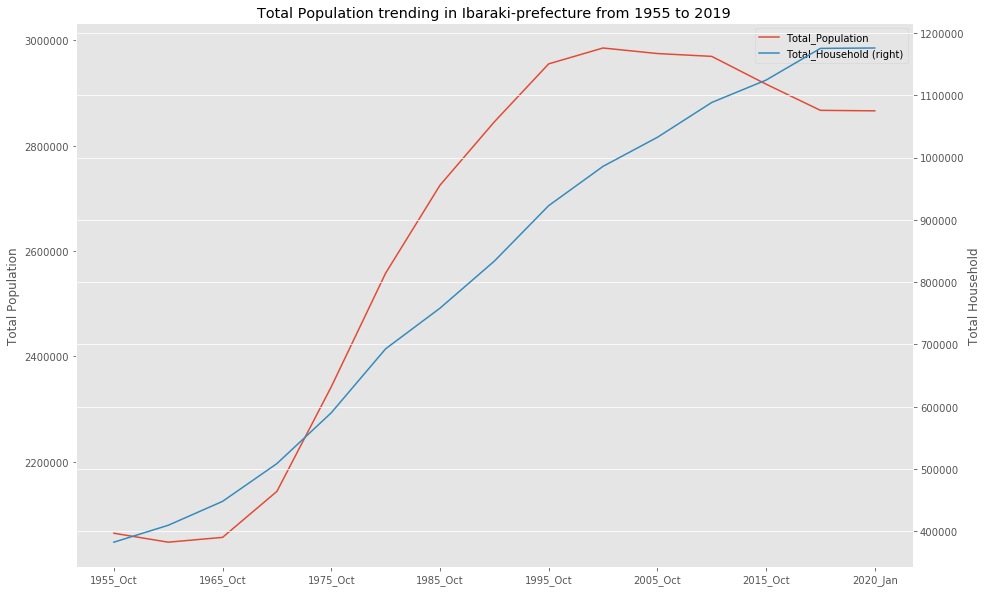

In [21]:
plt.figure()
ax = population_trending.plot(secondary_y=['Total_Household'], figsize=(15, 10))
ax.set_ylabel('Total Population')
ax.right_ax.set_ylabel('Total Household')
ax.set_title('Total Population trending in Ibaraki-prefecture from 1955 to 2019')
#population_trending['Total_Population'].plot(label='Total Population', legend=True, figsize=(15, 10))
#population_trending['Total_Household'].plot(secondary_y=True, label='Total Household', legend=True)
#plt.title('Total Population trending in Ibaraki-prefecture from 1955 to 2019')
#plt.xlabel('Years')
#plt.show()

### 2.1.1 Increase or Decrease of Population in Ibaraki-prefecture from 1955 to 2019

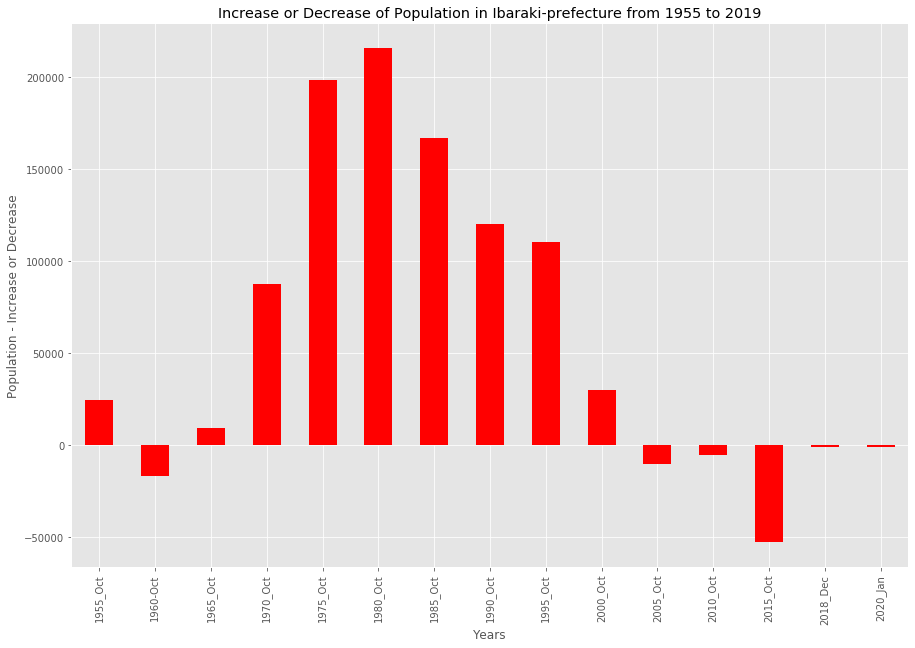

In [22]:
df0['Population_compared_to_previous_Investigation'].plot.bar(label='Increase or Decrease of Population', figsize=(15, 10), color='red')
plt.title('Increase or Decrease of Population in Ibaraki-prefecture from 1955 to 2019')
plt.xlabel('Years')
plt.ylabel('Population - Increase or Decrease')
plt.show()

## 2.2. Visualiztion data in Table 2

### 2.2.1 Total Population changes in nearest year segmented by Gender

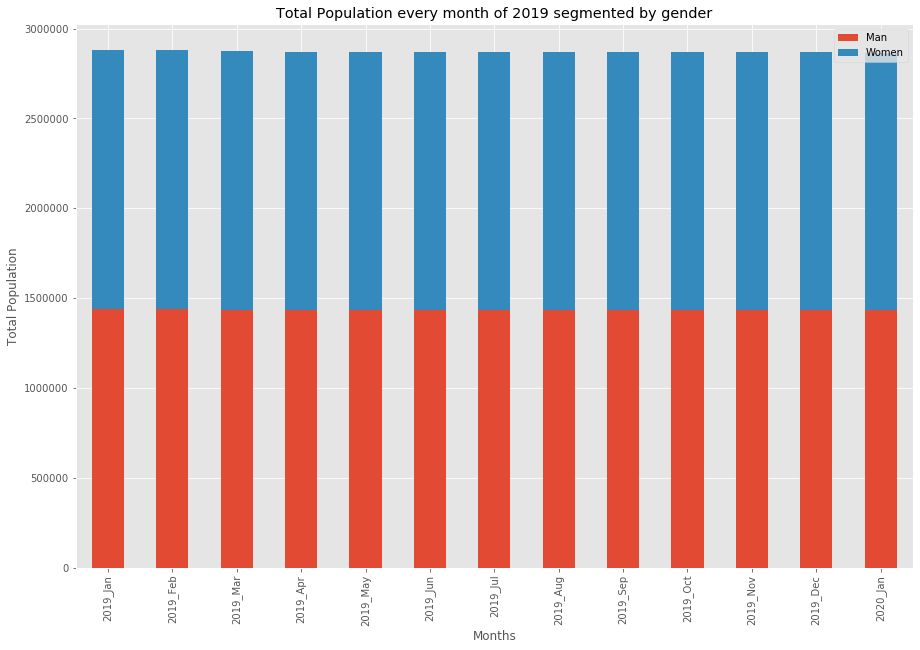

In [23]:
df1_population_gender = df1[['Man', 'Women']]
df1_population_gender.plot.bar(stacked=True, figsize=(15, 10))
plt.title('Total Population every month of 2019 segmented by gender')
plt.xlabel('Months')
plt.ylabel('Total Population')
plt.show()

### 2.2.2 Increase or Decrease of number of people in nearest year

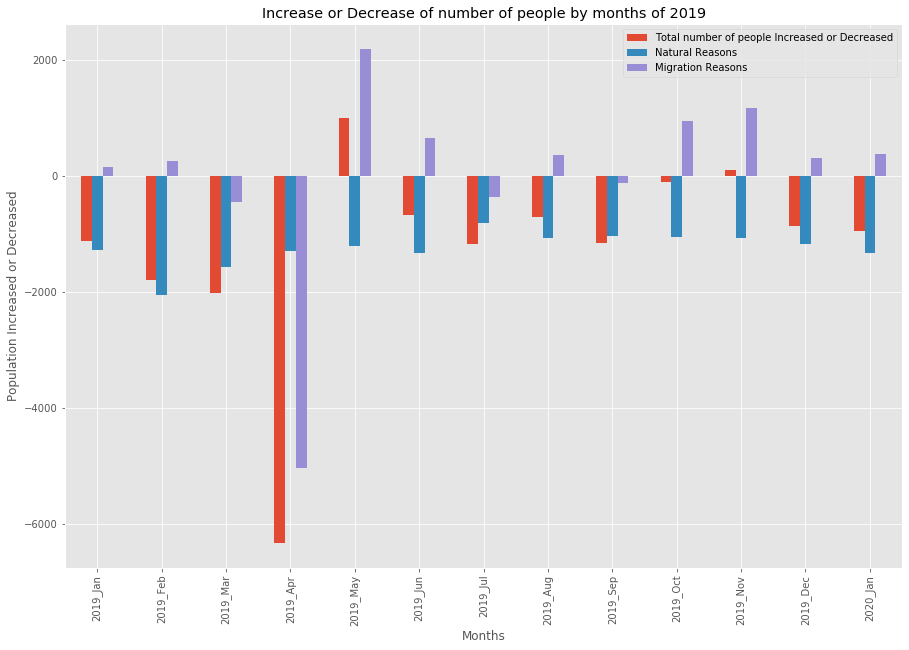

In [24]:
df1_increase_decrease = df1[['Increase_or_Decrease', 'Natural_Reasons', 'Migration_Reasons']]
ax = df1_increase_decrease.plot.bar(figsize=(15, 10))
ax.set_xlabel('Months')
ax.set_ylabel('Population Increased or Decreased')
ax.set_title('Increase or Decrease of number of people by months of 2019')
#plt.title('Increase or Decrease of number of people by months of 2019')
#plt.xlabel('Months')
#plt.ylabel('Population Increased or Decreased')
ax.legend(['Total number of people Increased or Decreased', 'Natural Reasons', 'Migration Reasons'])
#plt.show()

## 2.3. Visualiztion data in Table 3

### 2.2.1 Compare Total Population by area

Text(0.5, 1.0, 'Total Population by areas')

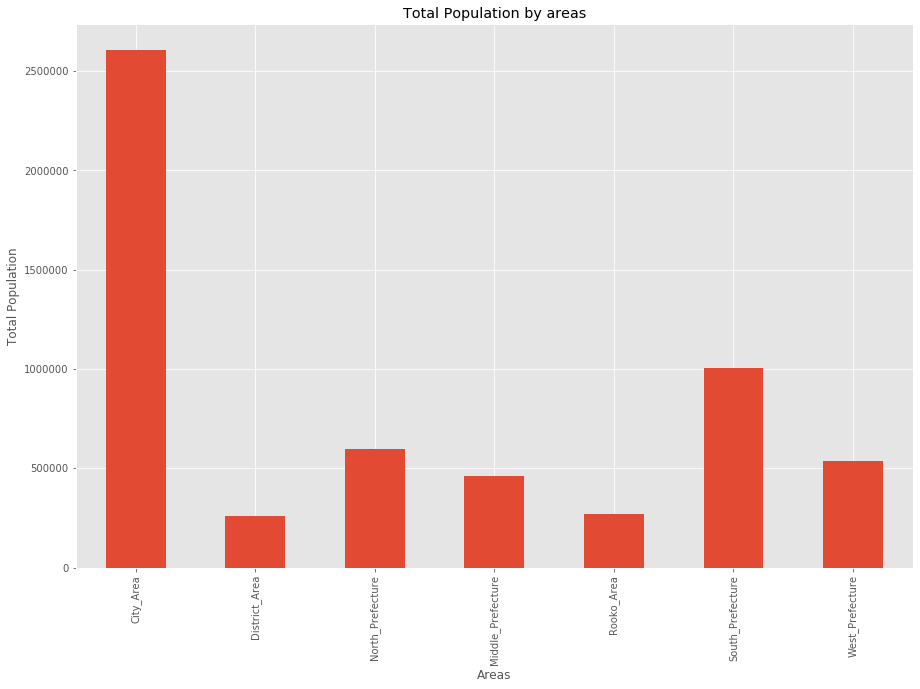

In [25]:
df2_areas_total = df2['Total_Population']
ax = df2_areas_total.plot.bar(figsize=(15, 10))
ax.set_xlabel('Areas')
ax.set_ylabel('Total Population')
ax.set_title('Total Population by areas')

## 2.3. Visualization data in Table 4-1 & Table 6

### 2.3.1 Compare Total Population by cities

There was already a table of population ranking by cities in the website. But in this project, for the purpose of pratice, I'll try to re-order data in Table 4-1 to investigate the best 10 populated cities.

In [26]:
# Sort dataframe by Total_Population
df3_sorted = df3.sort_values(['Total_Population'], ascending=False, axis=0)
df3_sorted.head(10)

,Total_Household,Total_Population,Man,Women,Increase_or_Decrease,Natural_Reasons,Birth,Dead,Migration_Reasons,In,Out
Mito-shi,122398,269763,132189,137574,-51,-68,155,223,17,593,576
Tsukuba-shi,107915,241808,122187,119621,210,52,214,162,158,984,826
Hitachi-shi,78163,175635,87549,88086,-158,-96,70,166,-62,284,346
Hitachinaka-shi,64351,155045,78367,76678,-50,-40,91,131,-10,348,358
Koga-shi,55670,139107,69691,69416,-46,-63,75,138,17,495,478
Tsuchiura-shi,60369,138557,69126,69431,14,-60,79,139,74,480,406
Toride-shi,45323,104611,51354,53257,6,-51,40,91,57,536,479
Chikusei-shi,37290,100658,49916,50742,-97,-46,60,106,-51,164,215
Kamisu-shi,40279,95428,49402,46026,37,-7,64,71,44,263,219
Ushiku-shi,34709,84589,41709,42880,-46,-23,33,56,-23,241,264


Text(0.5, 1.0, 'Top 10 most populated cities in Ibaraki')

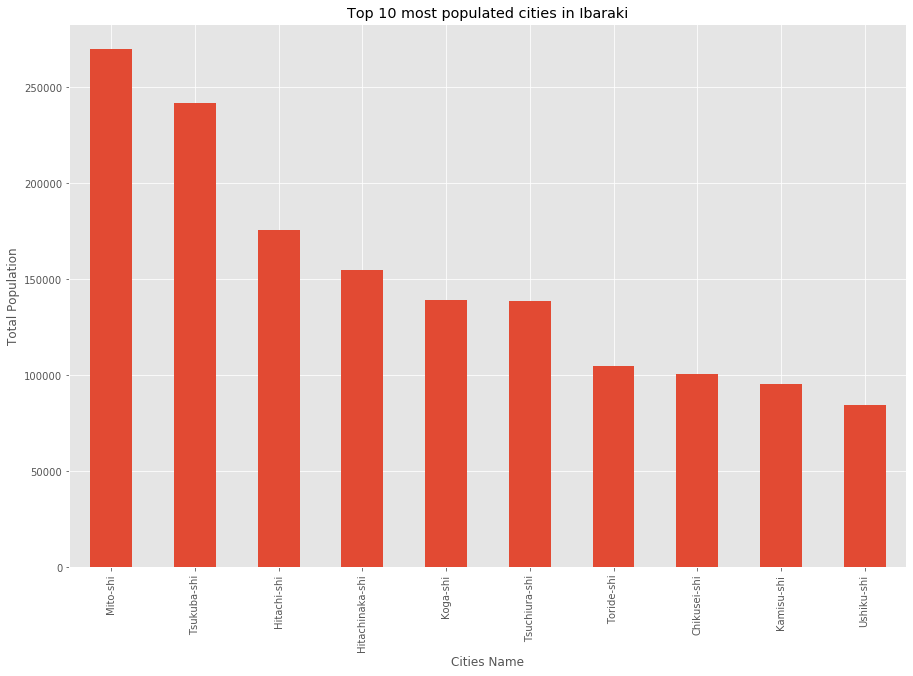

In [27]:
# Extract a dataframe of top 10 populated cities
df3_sorted_top10 = df3_sorted.head(10)['Total_Population']

# Total Population Visualization to understand more about difference among those cities
ax = df3_sorted_top10.plot.bar(figsize=(15, 10))
ax.set_xlabel('Cities Name')
ax.set_ylabel('Total Population')
ax.set_title('Top 10 most populated cities in Ibaraki')

### 2.3.2 Compare Population change in 2019 among top 10 populated cities

Now, I had a list of top 10 most populated cities in Ibaraki prefecture. The next step, I'll do an investigation to clarify which cities have acceptable population change during nearest years by implant a join function with table 6. 

In [28]:
# Creat a dataframe of changes in population in 2019 of top 10 populated cities
df6_df3_top10 = pd.merge(df3_sorted_top10, df6, left_index=True, right_index=True)
df6_df3_top10.drop(['Total_Population'], axis=1, inplace=True)
df6_df3_top10

,2018_Dec,2019_Jan,2019_Feb,2019-Mar,2019-Apr,2019-May,2019-Jun,2019-Jul,2019-Aug,2019-Sep,2019-Oct,2019-Nov,2019-Dec,Total2019
Mito-shi,-87,-83,16,-673,181,-35,-65,-44,85,-57,213,-60,-51,-573
Tsukuba-shi,213,253,102,-303,1384,350,174,215,138,713,437,174,210,3847
Hitachi-shi,-205,-213,-314,-555,-155,-146,-161,-126,-277,-154,-158,-118,-158,-2535
Hitachinaka-shi,-49,-75,-52,-457,82,45,-23,9,-56,-37,40,-25,-50,-599
Koga-shi,30,-97,-156,-141,-50,-33,-72,-58,83,-10,-127,6,-46,-701
Tsuchiura-shi,-43,-141,-132,-446,53,-113,-64,-90,-3,64,13,13,14,-832
Toride-shi,22,14,-171,-128,-117,149,-75,59,-118,51,52,-114,6,-392
Chikusei-shi,-58,-97,-97,-223,-57,-68,-52,-136,-87,-29,-9,-52,-97,-1004
Kamisu-shi,-38,-26,-13,-133,96,103,21,50,-10,-3,-10,31,37,143
Ushiku-shi,-25,-3,27,-93,70,-47,-12,-29,-8,-33,33,-35,-46,-176


Now, create a graph to compare total changes in 1 years

Text(0.5, 1.0, 'Total changes population in 1 years of top 10 populated cities')

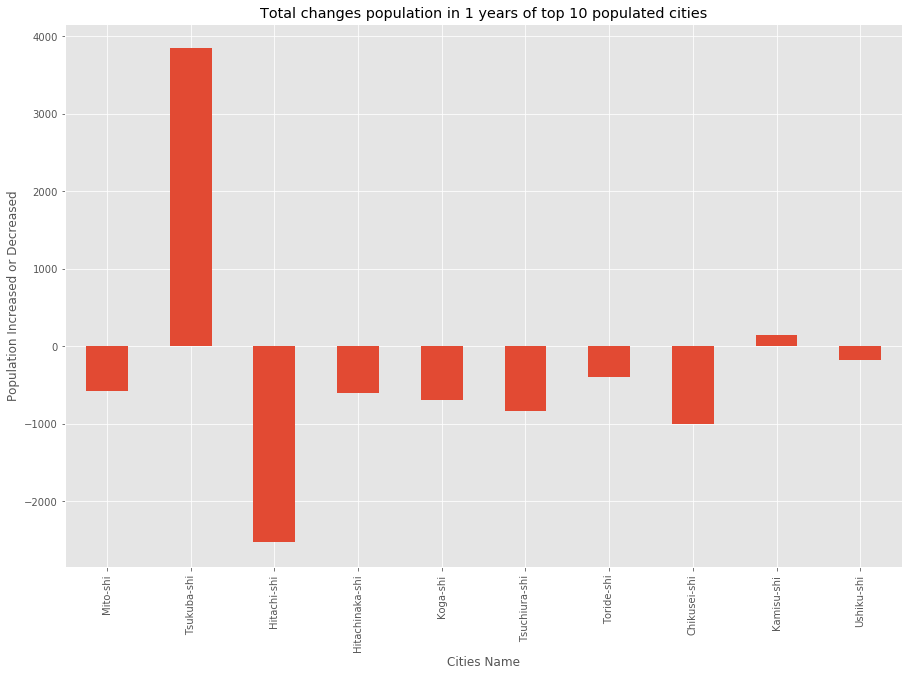

In [29]:
ax = df6_df3_top10['Total2019'].plot.bar(figsize=(15, 10))
ax.set_xlabel('Cities Name')
ax.set_ylabel('Population Increased or Decreased')
ax.set_title('Total changes population in 1 years of top 10 populated cities')

Investigate for the changes by months

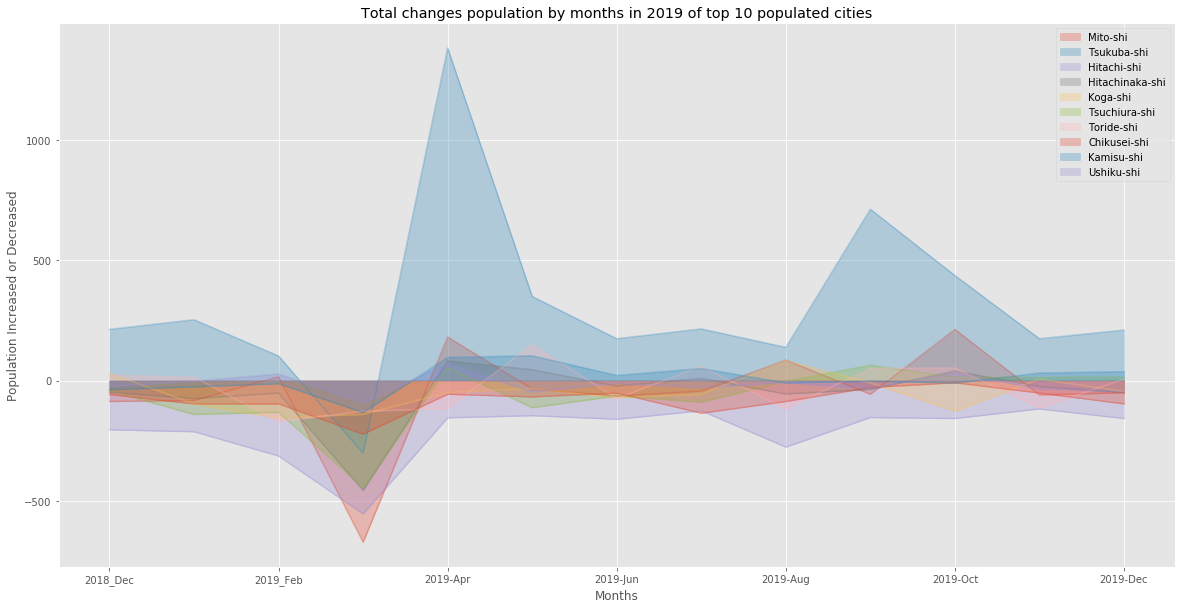

In [30]:
df6_top10_months = df6_df3_top10.drop(['Total2019'], axis=1)
df6_top10_months = df6_top10_months.transpose() 
df6_top10_months.plot(kind='area', 
                      alpha=0.3, # 0-1, default value a= 0.5
                      stacked=False,
                      figsize=(20, 10),
                     )
plt.title('Total changes population by months in 2019 of top 10 populated cities')
plt.ylabel('Population Increased or Decreased')
plt.xlabel('Months')
plt.show()

We can see that there are only 2 cities have population increased during 2019.
Even in the impact of aging population, Tsukuba-shi keeps a very significant Increase during almost months of the year.
From that, we can understand that many people come to this cities for business last years.
At this time, I can chose Tsukuba-shi as the selection for more investigation to select the best place for open a coffee shop.

## 2.4. Mapping top 10 populated cities to see geographical positions

In [31]:
# Folium is not available by default. So, we first need to install it before we are able to import it.
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.4               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [32]:
# Using Opencagedata.com API to get longitude-latitude coordinates of top 10 cities
!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = 'f4042a615c4f4ff3809c762c96d1569d'  #get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)

list_lat = []   # create empty lists
list_long = []
for index, row in df6_df3_top10.iterrows(): # iterate over rows in dataframe
    City = index       
    query = str(City)+','+'Ibaraki'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df6_df3_top10['Latitude'] = list_lat   
df6_df3_top10['Longtitude'] = list_long
df6_df3_top10

,2018_Dec,2019_Jan,2019_Feb,2019-Mar,2019-Apr,2019-May,2019-Jun,2019-Jul,2019-Aug,2019-Sep,2019-Oct,2019-Nov,2019-Dec,Total2019,Latitude,Longtitude
Mito-shi,-87,-83,16,-673,181,-35,-65,-44,85,-57,213,-60,-51,-573,36.365779,140.471393
Tsukuba-shi,213,253,102,-303,1384,350,174,215,138,713,437,174,210,3847,36.083388,140.076510
Hitachi-shi,-205,-213,-314,-555,-155,-146,-161,-126,-277,-154,-158,-118,-158,-2535,36.589084,140.763958
Hitachinaka-shi,-49,-75,-52,-457,82,45,-23,9,-56,-37,40,-25,-50,-599,36.396124,140.535340
Koga-shi,30,-97,-156,-141,-50,-33,-72,-58,83,-10,-127,6,-46,-701,36.178025,139.755364
Tsuchiura-shi,-43,-141,-132,-446,53,-113,-64,-90,-3,64,13,13,14,-832,36.078630,140.204593
Toride-shi,22,14,-171,-128,-117,149,-75,59,-118,51,52,-114,6,-392,35.911532,140.050178
Chikusei-shi,-58,-97,-97,-223,-57,-68,-52,-136,-87,-29,-9,-52,-97,-1004,36.305194,139.979090
Kamisu-shi,-38,-26,-13,-133,96,103,21,50,-10,-3,-10,31,37,143,35.889900,140.664575
Ushiku-shi,-25,-3,27,-93,70,-47,-12,-29,-8,-33,33,-35,-46,-176,35.980022,140.158128


In [33]:
# create map and display it
ibaraki_map = folium.Map(location=[36.078630, 140.204593], zoom_start=9)

# instantiate a feature group for the cities in the dataframe
cities = folium.map.FeatureGroup()

# loop through top 10 cities and add each to the cities feature group
for lat, lng, in zip(df6_df3_top10.Latitude, df6_df3_top10.Longtitude):
    cities.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df6_df3_top10.Latitude)
longitudes = list(df6_df3_top10.Longtitude)
labels = list(df6_df3_top10.index)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(ibaraki_map)    
    
# add cities to map
ibaraki_map.add_child(cities)

From the map I understand that:
> - **Mito-shi, Hitachi-shi, Hitachinaka-shi**: In top 5 of populated cities but far from Tokyo.
> - **Kamisu-shi**: Population lightly increased in 2019 but seems not so good for transportation.
> - **Tsukuba-shi**: Meets all the requirements: Easy access to Tokyo, Population Increasing, Second populated cities in prefecture.
#### => Sellect **Tsukuba-shi** as city to open new Coffee Shop

## 3. Investigating Neighborhood of Tsukuba-shi

In [34]:
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --ye
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

#### I know that there are 4 train station located in Tsukuba: Tsukuba-station, Kenkyugakuen-station, Banpaku Kinenkoen-station, Midorino-station. I'll get the latitude & longtitude data of these stations

#### Get the latitude & longtitude data of Tsukuba-station

In [35]:
station1 = 'Tsukuba-station, Tsukuba-shi, Ibaraki'
results1 = geocoder.geocode(station1)
lat1 = results1[0]['geometry']['lat']
lng1 = results1[0]['geometry']['lng']
print (lat1, lng1)

36.0825835 140.111247


#### Get the latitude & longtitude data of Kenkyugakuen-station

In [36]:
station2 = 'Kenkyugakuen-station, Tsukuba-shi, Ibaraki'
results2 = geocoder.geocode(station2)
lat2 = results2[0]['geometry']['lat']
lng2 = results2[0]['geometry']['lng']
print (lat2, lng2)

36.0844107 140.0863296


#### Get the latitude & longtitude data of Banpaku Kinenkoen-station

In [37]:
station3 = 'Banpaku Kinenkoen-station, Tsukuba-shi, Ibaraki'
results3 = geocoder.geocode(station3)
lat3 = results3[0]['geometry']['lat']
lng3 = results3[0]['geometry']['lng']
print (lat3, lng3)

36.10532 140.08174


#### Get the latitude & longtitude data of Midorino-station

In [38]:
station4 = 'Midorino-station, Tsukuba-shi, Ibaraki'
results4 = geocoder.geocode(station4)
lat4 = results4[0]['geometry']['lat']
lng4 = results4[0]['geometry']['lng']
print (lat4, lng4)

36.0298606 140.0563392


In [39]:
CLIENT_ID = '2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3' # my Foursquare ID
CLIENT_SECRET = 'OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T' # my Foursquare Secret
VERSION = '20200501' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3
CLIENT_SECRET:OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T


### 3.1. Get the top 100 venues that are near each stations within a radius of 2km

#### 3.1.1. Get the top 100 venues that are near Tsukuba-station within a radius of 2km

In [40]:
# Format url
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat1, lng1, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3&client_secret=OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T&ll=36.0825835,140.111247&v=20200501&radius=2000&limit=100'

In [41]:
results = requests.get(url).json()

In [42]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get a list of venues

In [43]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,SAZA COFFEE つくば駅前店,Coffee Shop,36.081613,140.112569
1,Ton Q (とんQ),Tonkatsu Restaurant,36.077033,140.110646
2,Starbucks,Coffee Shop,36.081894,140.111416
3,Tsukuba Expo Center (つくばエキスポセンター),Science Museum,36.086025,140.110567
4,La Cote d'Azur (コート・ダジュール本店),Dessert Shop,36.076966,140.113734
...,...,...,...,...
95,珍来 千現店,Noodle House,36.073195,140.125970
96,Tsukuba Creo Square Q't (つくばクレオスクエア Q't),Shopping Mall,36.081766,140.111592
97,Saizeriya (サイゼリヤ),Italian Restaurant,36.082084,140.111194
98,Lawson (ローソン つくば駅バスターミナル店),Convenience Store,36.081788,140.113088


#### Group the venues by categories and create a dataframe

In [44]:
group = nearby_venues.groupby('categories').count()
venues_tsukuba = group.drop(['lat', 'lng'], axis=1)
venues_tsukuba

,name
categories,
Arcade,2
BBQ Joint,3
Bakery,2
Bar,1
Bookstore,1
Botanical Garden,1
Burger Joint,1
Café,4
Chinese Restaurant,2


#### 3.1.1. Get the top 100 venues that are near Kenkyugakuen-station within a radius of 2km

In [45]:
# Format url
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat2, lng2, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3&client_secret=OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T&ll=36.0844107,140.0863296&v=20200501&radius=2000&limit=100'

In [46]:
results = requests.get(url).json()

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get a list of venues

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,KALDI COFFEE FARM,Coffee Shop,36.085179,140.084000
1,Ootoya (大戸屋),Japanese Restaurant,36.086790,140.084784
2,iias Tsukuba (イーアスつくば),Shopping Mall,36.086305,140.084287
3,ACADEMIA イーアスつくば店,Bookstore,36.086304,140.084014
4,MOVIXつくば,Multiplex,36.087348,140.084537
...,...,...,...,...
95,Kura Sushi (くら寿司),Sushi Restaurant,36.072147,140.086632
96,Daiso (ダイソー),Discount Store,36.073534,140.103364
97,McDonald's (マクドナルド つくば学園店),Fast Food Restaurant,36.076381,140.103784
98,KFC (ケンタッキーフライドチキン 筑波学園店),Fried Chicken Joint,36.076267,140.104531


#### Group the venues by categories and create a dataframe

In [49]:
group = nearby_venues.groupby('categories').count()
venues_kenkyugakuen = group.drop(['lat', 'lng'], axis=1)
venues_kenkyugakuen

,name
categories,
Arcade,1
Auto Workshop,1
Bakery,1
Bed & Breakfast,1
Bookstore,2
Brazilian Restaurant,1
Burger Joint,1
Café,3
Chinese Restaurant,2


#### 3.1.1. Get the top 100 venues that are near Banpaku Kinenkoen-station within a radius of 2km

In [50]:
# Format url
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat3, lng3, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3&client_secret=OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T&ll=36.10532,140.08174&v=20200501&radius=2000&limit=100'

In [51]:
results = requests.get(url).json()

In [52]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get a list of venues

In [53]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Science Museum of Map and Survey (地図と測量の科学館),Science Museum,36.103989,140.085608
1,Costco (コストコ),Warehouse Store,36.096088,140.079904
2,トライアル つくば学園都市店,Discount Store,36.096044,140.087105
3,百香亭 つくば本店,Chinese Restaurant,36.097539,140.091990
4,ウエストハウス 学園店,Restaurant,36.099893,140.086260
...,...,...,...,...
60,東光台体育館,Stadium,36.092349,140.067413
61,南原児童公園,Park,36.093058,140.097040
62,マライカ Bazzar つくば店,Arts & Crafts Store,36.093640,140.098180
63,小野酒店,Liquor Store,36.088470,140.074474


#### Group the venues by categories and create a dataframe

In [54]:
group = nearby_venues.groupby('categories').count()
venues_banpakukinenkoen = group.drop(['lat', 'lng'], axis=1)
venues_banpakukinenkoen

,name
categories,
Arts & Crafts Store,1
Bakery,3
Big Box Store,1
Bus Station,1
Bus Stop,1
Café,1
Chinese Restaurant,1
Coffee Shop,3
College Cafeteria,1


#### 3.1.1. Get the top 100 venues that are near Midorino-station within a radius of 2km

In [55]:
# Format url
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat4, lng4, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=2ALIJHDF3E3IUXS2XEHT14JR5CV1J0Z214PQNAEAFX1MR5G3&client_secret=OQDZYRZRQX14JYWX2GNI5GX2XU0HT0I2SQ1HWAGXNWHVNR1T&ll=36.0298606,140.0563392&v=20200501&radius=2000&limit=100'

In [56]:
results = requests.get(url).json()

In [57]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get a list of venues

In [58]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,7-Eleven (セブンイレブン つくばみどりの店),Convenience Store,36.029947,140.054331
1,ウエルシア つくばみどりの店,Drugstore,36.028618,140.054335
2,カスミ みどりの駅前店,Grocery Store,36.031172,140.054694
3,FamilyMart (ファミリーマート つくば萱丸店),Convenience Store,36.035512,140.054639
4,Ministop (ミニストップ つくばみどりの店),Convenience Store,36.032079,140.051663
5,Midorino Station (みどりの駅),Train Station,36.029798,140.056148
6,FamilyMart (ファミリーマート つくばみどりの店),Convenience Store,36.026229,140.061125
7,ローソン つくばみどりの店,Convenience Store,36.024546,140.063613
8,FamilyMart (ファミリーマート つくば谷田部中央店),Convenience Store,36.035052,140.069630
9,7-Eleven (セブンイレブン つくば真瀬入口店),Convenience Store,36.041952,140.041160


#### Group the venues by categories and create a dataframe

In [59]:
group = nearby_venues.groupby('categories').count()
venues_midorino = group.drop(['lat', 'lng'], axis=1)
venues_midorino

,name
categories,
Baseball Field,1
Café,1
Coffee Shop,1
Convenience Store,9
Diner,2
Drugstore,1
Farmers Market,1
Food & Drink Shop,1
Grocery Store,1


### 3.1. Number of venues by categories comparing among 4 stations

In [60]:
# Merge all dataframes & Rename the columns
merge_venues = venues_tsukuba.merge(venues_kenkyugakuen, left_index=True, right_index=True).merge(venues_banpakukinenkoen, left_index=True, right_index=True).merge(venues_midorino, left_index=True, right_index=True)
merge_venues_newcolums = ['Tsukuba-station', 'Kenkyugakuen-station', 'Banpaku_Kinenkoen-station', 'Midorino-station']
merge_venues.columns = merge_venues_newcolums

In [61]:
# Though only "Cafe" % "Coffee Shop" seem to be competitors, remove others index & some these 2 rows.
coffe_venues = merge_venues[:2]
coffe_venues = coffe_venues.sum(axis=0)
coffe_venues

Tsukuba-station              8
Kenkyugakuen-station         9
Banpaku_Kinenkoen-station    4
Midorino-station             2
dtype: int64

#### Conclusion: Midorino-Station may the best place to open a new Coffee Shop!